In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Dropout, Activation
style.use('fivethirtyeight')

scl = MinMaxScaler()

In [2]:
def handle_non_numerical_data(data):
    columns = data.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if data[column].dtype != np.int64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            
            data[column] = list(map(convert_to_int, data[column]))
    return data

In [3]:
orig_train_data = pd.read_csv("/home/mdeogune/Downloads/Recog_data_release/train.csv")
orig_test_data = pd.read_csv("/home/mdeogune/Downloads/Recog_data_release/test.csv")
train_data = orig_train_data
test_data = orig_test_data
train_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
1,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
2,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
3,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
4,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [4]:
train_data = handle_non_numerical_data(train_data)
print(train_data.shape)

from sklearn.model_selection import train_test_split

(632, 33)


In [129]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['G3'], 1)
# print(X['studytime'])
X['studytime']=X['studytime']**2
# X['internet']=X['internet']**2
# X['G1']=X['G1']**2
# X['G2']=X['G2']**2

X1=np.array(X)


y = train_data['G3']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train,y_train=X,y
print(X_test.columns.values)

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2']


In [122]:
from keras.models import Sequential
from keras.layers import Dense, Merge
from keras.optimizers import SGD, Adam, RMSprop,Nadam,Adagrad
from keras.callbacks import ModelCheckpoint

batch_size = 128
nb_classes = 10
nb_epoch = 1000

checkpoint = ModelCheckpoint(filepath='Adagrad2.h5', verbose=1, save_best_only=True)

In [132]:
model = Sequential()
model.add(Dense(40, activation="relu", input_shape=(32,)))
# model.add(Dropout(0.5))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
# model.add(Dense(50, activation="relu"))
# model.add(Dropout(1))
model.add(Dense(1))
# model.add(Activation('softmax'))
model.load_weights('Adagrad2.h5')
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=Adagrad(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1,callbacks=[checkpoint],validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 40)                1320      
_________________________________________________________________
dense_150 (Dense)            (None, 30)                1230      
_________________________________________________________________
dense_151 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 11        
Total params: 2,871
Trainable params: 2,871
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 505 samples, validate on 127 samples
Epoch 1/1000
505/505 [==============================] - 1s 3ms/step - loss: 21.8465 - acc: 0.1287 - val_loss: 3.2652 - val_acc: 0.2441
Epoch 2/1000
505/505 [==============================] - 0s 36us/step - loss: 2.2512 - acc: 0.2812 - val_loss: 2.1075 - val_acc: 0.3071
Epoch 3/1000
505/505 [==============================] - 0s 36us/step - loss: 1.7221 - acc: 0.3267 - val_loss: 1.7974 - val_acc: 0.3150
Epoch 4/1000
505/505 [==============================] - 0s 53us/step - loss: 1.4617 - acc: 0.3426 - val_loss: 1.6369 - val_acc: 0.3543
Epoch 5/1000
505/505 [==============================] - 0s 40us/step - loss: 1.3023 - acc: 0.3604 - val_loss: 1.4969 - val_acc: 0.3465
Epoch 6/1000
505/505 [==============================] - 0s 46us/step - loss: 1.2650 - acc: 0.3525 - val_loss: 1.4237 - val_acc: 0.3307
Epoch 7/1000
505/505 [==============================] - 0s 48us/step - loss: 1.1242 - acc: 0.3941 - val_loss: 1.3507 - val_acc: 0.3780
Epoch 8/1

505/505 [==============================] - 0s 44us/step - loss: 0.2564 - acc: 0.7248 - val_loss: 0.3924 - val_acc: 0.6142
Epoch 66/1000
505/505 [==============================] - 0s 40us/step - loss: 0.2413 - acc: 0.7366 - val_loss: 0.3872 - val_acc: 0.6220
Epoch 67/1000
505/505 [==============================] - 0s 40us/step - loss: 0.2389 - acc: 0.7525 - val_loss: 0.4072 - val_acc: 0.5984
Epoch 68/1000
505/505 [==============================] - 0s 40us/step - loss: 0.2465 - acc: 0.7347 - val_loss: 0.3981 - val_acc: 0.5906
Epoch 69/1000
505/505 [==============================] - 0s 58us/step - loss: 0.2443 - acc: 0.7267 - val_loss: 0.3809 - val_acc: 0.6299
Epoch 70/1000
505/505 [==============================] - 0s 53us/step - loss: 0.2315 - acc: 0.7525 - val_loss: 0.3776 - val_acc: 0.6535
Epoch 71/1000
505/505 [==============================] - 0s 43us/step - loss: 0.2333 - acc: 0.7465 - val_loss: 0.3737 - val_acc: 0.6220
Epoch 72/1000
505/505 [==============================] - 0s 58

Epoch 98/1000
505/505 [==============================] - 0s 57us/step - loss: 0.1902 - acc: 0.7683 - val_loss: 0.3155 - val_acc: 0.6457
Epoch 99/1000
505/505 [==============================] - 0s 55us/step - loss: 0.1906 - acc: 0.7762 - val_loss: 0.3188 - val_acc: 0.6614
Epoch 100/1000
505/505 [==============================] - 0s 43us/step - loss: 0.2039 - acc: 0.7505 - val_loss: 0.3532 - val_acc: 0.6614
Epoch 101/1000
505/505 [==============================] - 0s 50us/step - loss: 0.2218 - acc: 0.7406 - val_loss: 0.3395 - val_acc: 0.6693
Epoch 102/1000
505/505 [==============================] - 0s 39us/step - loss: 0.1979 - acc: 0.7703 - val_loss: 0.3335 - val_acc: 0.6850
Epoch 103/1000
505/505 [==============================] - 0s 47us/step - loss: 0.1935 - acc: 0.7604 - val_loss: 0.3191 - val_acc: 0.6929
Epoch 104/1000
505/505 [==============================] - 0s 46us/step - loss: 0.1840 - acc: 0.7663 - val_loss: 0.3068 - val_acc: 0.6772
Epoch 105/1000
505/505 [===================

505/505 [==============================] - 0s 56us/step - loss: 0.1500 - acc: 0.8119 - val_loss: 0.2571 - val_acc: 0.7402
Epoch 163/1000
505/505 [==============================] - 0s 45us/step - loss: 0.1503 - acc: 0.8139 - val_loss: 0.2487 - val_acc: 0.7244
Epoch 164/1000
505/505 [==============================] - 0s 39us/step - loss: 0.1515 - acc: 0.8178 - val_loss: 0.2421 - val_acc: 0.7402
Epoch 165/1000
505/505 [==============================] - 0s 48us/step - loss: 0.1505 - acc: 0.8079 - val_loss: 0.2416 - val_acc: 0.7402
Epoch 166/1000
505/505 [==============================] - 0s 55us/step - loss: 0.1633 - acc: 0.7861 - val_loss: 0.2681 - val_acc: 0.7165
Epoch 167/1000
505/505 [==============================] - 0s 50us/step - loss: 0.1462 - acc: 0.8277 - val_loss: 0.2417 - val_acc: 0.7480
Epoch 168/1000
505/505 [==============================] - 0s 43us/step - loss: 0.1435 - acc: 0.8139 - val_loss: 0.2420 - val_acc: 0.7402
Epoch 169/1000
505/505 [==============================] 

505/505 [==============================] - 0s 35us/step - loss: 0.1193 - acc: 0.8495 - val_loss: 0.2028 - val_acc: 0.7717
Epoch 227/1000
505/505 [==============================] - 0s 49us/step - loss: 0.1229 - acc: 0.8554 - val_loss: 0.2049 - val_acc: 0.7795
Epoch 228/1000
505/505 [==============================] - 0s 46us/step - loss: 0.1214 - acc: 0.8436 - val_loss: 0.2031 - val_acc: 0.7717
Epoch 229/1000
505/505 [==============================] - 0s 43us/step - loss: 0.1186 - acc: 0.8416 - val_loss: 0.1980 - val_acc: 0.7717
Epoch 230/1000
505/505 [==============================] - 0s 37us/step - loss: 0.1220 - acc: 0.8436 - val_loss: 0.1988 - val_acc: 0.7874
Epoch 231/1000
505/505 [==============================] - 0s 41us/step - loss: 0.1170 - acc: 0.8455 - val_loss: 0.1956 - val_acc: 0.7638
Epoch 232/1000
505/505 [==============================] - 0s 64us/step - loss: 0.1170 - acc: 0.8475 - val_loss: 0.1957 - val_acc: 0.7717
Epoch 233/1000
505/505 [==============================] 

Epoch 288/1000
505/505 [==============================] - 0s 42us/step - loss: 0.1012 - acc: 0.8673 - val_loss: 0.1709 - val_acc: 0.7953
Epoch 289/1000
505/505 [==============================] - 0s 33us/step - loss: 0.1089 - acc: 0.8673 - val_loss: 0.1740 - val_acc: 0.7874
Epoch 290/1000
505/505 [==============================] - 0s 122us/step - loss: 0.1049 - acc: 0.8673 - val_loss: 0.1684 - val_acc: 0.8031
Epoch 291/1000
505/505 [==============================] - 0s 39us/step - loss: 0.1069 - acc: 0.8535 - val_loss: 0.1724 - val_acc: 0.7874
Epoch 292/1000
505/505 [==============================] - 0s 33us/step - loss: 0.1047 - acc: 0.8653 - val_loss: 0.1695 - val_acc: 0.7953
Epoch 293/1000
505/505 [==============================] - 0s 111us/step - loss: 0.1086 - acc: 0.8713 - val_loss: 0.1665 - val_acc: 0.8110
Epoch 294/1000
505/505 [==============================] - 0s 61us/step - loss: 0.1177 - acc: 0.8594 - val_loss: 0.1807 - val_acc: 0.7953
Epoch 295/1000
505/505 [===============

505/505 [==============================] - 0s 118us/step - loss: 0.0946 - acc: 0.8871 - val_loss: 0.1551 - val_acc: 0.8268
Epoch 319/1000
505/505 [==============================] - 0s 47us/step - loss: 0.0944 - acc: 0.8792 - val_loss: 0.1601 - val_acc: 0.8031
Epoch 320/1000
505/505 [==============================] - 0s 141us/step - loss: 0.0946 - acc: 0.8673 - val_loss: 0.1544 - val_acc: 0.8189
Epoch 321/1000
505/505 [==============================] - 0s 120us/step - loss: 0.0931 - acc: 0.8871 - val_loss: 0.1540 - val_acc: 0.8268
Epoch 322/1000
505/505 [==============================] - 0s 109us/step - loss: 0.0959 - acc: 0.8792 - val_loss: 0.1532 - val_acc: 0.8268
Epoch 323/1000
505/505 [==============================] - 0s 57us/step - loss: 0.0933 - acc: 0.8911 - val_loss: 0.1572 - val_acc: 0.8189
Epoch 324/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0943 - acc: 0.8832 - val_loss: 0.1541 - val_acc: 0.8189
Epoch 325/1000
505/505 [============================

Epoch 378/1000
505/505 [==============================] - 0s 124us/step - loss: 0.0813 - acc: 0.9089 - val_loss: 0.1328 - val_acc: 0.8346
Epoch 379/1000
505/505 [==============================] - 0s 44us/step - loss: 0.0896 - acc: 0.8970 - val_loss: 0.1406 - val_acc: 0.8346
Epoch 380/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0835 - acc: 0.8990 - val_loss: 0.1385 - val_acc: 0.8346
Epoch 381/1000
505/505 [==============================] - 0s 48us/step - loss: 0.0826 - acc: 0.9030 - val_loss: 0.1332 - val_acc: 0.8425
Epoch 382/1000
505/505 [==============================] - 0s 56us/step - loss: 0.0808 - acc: 0.9089 - val_loss: 0.1329 - val_acc: 0.8425
Epoch 383/1000
505/505 [==============================] - 0s 118us/step - loss: 0.0820 - acc: 0.9010 - val_loss: 0.1311 - val_acc: 0.8346
Epoch 384/1000
505/505 [==============================] - 0s 56us/step - loss: 0.0867 - acc: 0.8990 - val_loss: 0.1333 - val_acc: 0.8346
Epoch 385/1000
505/505 [===============

Epoch 409/1000
505/505 [==============================] - 0s 125us/step - loss: 0.0769 - acc: 0.9149 - val_loss: 0.1246 - val_acc: 0.8425
Epoch 410/1000
505/505 [==============================] - 0s 125us/step - loss: 0.0781 - acc: 0.9168 - val_loss: 0.1239 - val_acc: 0.8425
Epoch 411/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0775 - acc: 0.9089 - val_loss: 0.1260 - val_acc: 0.8583
Epoch 412/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0772 - acc: 0.9109 - val_loss: 0.1259 - val_acc: 0.8504
Epoch 413/1000
505/505 [==============================] - 0s 48us/step - loss: 0.0759 - acc: 0.9188 - val_loss: 0.1287 - val_acc: 0.8425
Epoch 414/1000
505/505 [==============================] - 0s 110us/step - loss: 0.0766 - acc: 0.9168 - val_loss: 0.1230 - val_acc: 0.8504
Epoch 415/1000
505/505 [==============================] - 0s 50us/step - loss: 0.0751 - acc: 0.9168 - val_loss: 0.1244 - val_acc: 0.8504
Epoch 416/1000
505/505 [==============

Epoch 440/1000
505/505 [==============================] - 0s 65us/step - loss: 0.0926 - acc: 0.8970 - val_loss: 0.1264 - val_acc: 0.8425
Epoch 441/1000
505/505 [==============================] - 0s 140us/step - loss: 0.0733 - acc: 0.9287 - val_loss: 0.1162 - val_acc: 0.8583
Epoch 442/1000
505/505 [==============================] - 0s 134us/step - loss: 0.0710 - acc: 0.9208 - val_loss: 0.1162 - val_acc: 0.8504
Epoch 443/1000
505/505 [==============================] - 0s 46us/step - loss: 0.0701 - acc: 0.9248 - val_loss: 0.1165 - val_acc: 0.8504
Epoch 444/1000
505/505 [==============================] - 0s 60us/step - loss: 0.0703 - acc: 0.9208 - val_loss: 0.1163 - val_acc: 0.8583
Epoch 445/1000
505/505 [==============================] - 0s 49us/step - loss: 0.0706 - acc: 0.9188 - val_loss: 0.1173 - val_acc: 0.8583
Epoch 446/1000
505/505 [==============================] - 0s 129us/step - loss: 0.0715 - acc: 0.9267 - val_loss: 0.1160 - val_acc: 0.8425
Epoch 447/1000
505/505 [==============

Epoch 471/1000
505/505 [==============================] - 0s 44us/step - loss: 0.0664 - acc: 0.9208 - val_loss: 0.1129 - val_acc: 0.8819
Epoch 472/1000
505/505 [==============================] - 0s 126us/step - loss: 0.0735 - acc: 0.9228 - val_loss: 0.1102 - val_acc: 0.8583
Epoch 473/1000
505/505 [==============================] - 0s 48us/step - loss: 0.0672 - acc: 0.9267 - val_loss: 0.1123 - val_acc: 0.8504
Epoch 474/1000
505/505 [==============================] - 0s 113us/step - loss: 0.0667 - acc: 0.9267 - val_loss: 0.1098 - val_acc: 0.8583
Epoch 475/1000
505/505 [==============================] - 0s 106us/step - loss: 0.0660 - acc: 0.9208 - val_loss: 0.1092 - val_acc: 0.8583
Epoch 476/1000
505/505 [==============================] - 0s 102us/step - loss: 0.0659 - acc: 0.9208 - val_loss: 0.1085 - val_acc: 0.8583
Epoch 477/1000
505/505 [==============================] - 0s 43us/step - loss: 0.0664 - acc: 0.9248 - val_loss: 0.1140 - val_acc: 0.8504
Epoch 478/1000
505/505 [=============

505/505 [==============================] - 0s 40us/step - loss: 0.0626 - acc: 0.9267 - val_loss: 0.1040 - val_acc: 0.8661
Epoch 502/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0645 - acc: 0.9307 - val_loss: 0.1045 - val_acc: 0.8740
Epoch 503/1000
505/505 [==============================] - 0s 111us/step - loss: 0.0627 - acc: 0.9267 - val_loss: 0.1035 - val_acc: 0.8583
Epoch 504/1000
505/505 [==============================] - 0s 38us/step - loss: 0.0624 - acc: 0.9287 - val_loss: 0.1060 - val_acc: 0.8661
Epoch 505/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0707 - acc: 0.9168 - val_loss: 0.1165 - val_acc: 0.8425
Epoch 506/1000
505/505 [==============================] - 0s 39us/step - loss: 0.0654 - acc: 0.9347 - val_loss: 0.1035 - val_acc: 0.8740
Epoch 507/1000
505/505 [==============================] - 0s 105us/step - loss: 0.0623 - acc: 0.9267 - val_loss: 0.1028 - val_acc: 0.8583
Epoch 508/1000
505/505 [==============================

505/505 [==============================] - 0s 105us/step - loss: 0.0612 - acc: 0.9386 - val_loss: 0.0985 - val_acc: 0.8661
Epoch 532/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0586 - acc: 0.9307 - val_loss: 0.0996 - val_acc: 0.8661
Epoch 533/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0596 - acc: 0.9366 - val_loss: 0.1026 - val_acc: 0.8583
Epoch 534/1000
505/505 [==============================] - 0s 39us/step - loss: 0.0597 - acc: 0.9465 - val_loss: 0.0987 - val_acc: 0.8740
Epoch 535/1000
505/505 [==============================] - 0s 38us/step - loss: 0.0654 - acc: 0.9327 - val_loss: 0.1058 - val_acc: 0.8898
Epoch 536/1000
505/505 [==============================] - 0s 104us/step - loss: 0.0609 - acc: 0.9327 - val_loss: 0.0979 - val_acc: 0.8583
Epoch 537/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0589 - acc: 0.9307 - val_loss: 0.0991 - val_acc: 0.8740
Epoch 538/1000
505/505 [==============================

Epoch 592/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0520 - acc: 0.9426 - val_loss: 0.0902 - val_acc: 0.9055
Epoch 593/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0544 - acc: 0.9347 - val_loss: 0.0890 - val_acc: 0.8819
Epoch 594/1000
505/505 [==============================] - 0s 61us/step - loss: 0.0555 - acc: 0.9426 - val_loss: 0.0942 - val_acc: 0.9134
Epoch 595/1000
505/505 [==============================] - 0s 35us/step - loss: 0.0548 - acc: 0.9446 - val_loss: 0.0904 - val_acc: 0.8740
Epoch 596/1000
505/505 [==============================] - 0s 119us/step - loss: 0.0516 - acc: 0.9505 - val_loss: 0.0877 - val_acc: 0.8819
Epoch 597/1000
505/505 [==============================] - 0s 36us/step - loss: 0.0512 - acc: 0.9446 - val_loss: 0.0887 - val_acc: 0.8740
Epoch 598/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0515 - acc: 0.9446 - val_loss: 0.0893 - val_acc: 0.8740
Epoch 599/1000
505/505 [================

Epoch 653/1000
505/505 [==============================] - 0s 111us/step - loss: 0.0460 - acc: 0.9604 - val_loss: 0.0797 - val_acc: 0.9055
Epoch 654/1000
505/505 [==============================] - 0s 102us/step - loss: 0.0457 - acc: 0.9584 - val_loss: 0.0795 - val_acc: 0.9055
Epoch 655/1000
505/505 [==============================] - 0s 49us/step - loss: 0.0462 - acc: 0.9525 - val_loss: 0.0808 - val_acc: 0.9134
Epoch 656/1000
505/505 [==============================] - 0s 94us/step - loss: 0.0523 - acc: 0.9446 - val_loss: 0.0792 - val_acc: 0.9134
Epoch 657/1000
505/505 [==============================] - 0s 35us/step - loss: 0.0463 - acc: 0.9604 - val_loss: 0.0825 - val_acc: 0.9213
Epoch 658/1000
505/505 [==============================] - 0s 85us/step - loss: 0.0483 - acc: 0.9505 - val_loss: 0.0788 - val_acc: 0.9055
Epoch 659/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0457 - acc: 0.9604 - val_loss: 0.0801 - val_acc: 0.8898
Epoch 660/1000
505/505 [===============

Epoch 683/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0531 - acc: 0.9505 - val_loss: 0.0783 - val_acc: 0.9213
Epoch 684/1000
505/505 [==============================] - 0s 49us/step - loss: 0.0455 - acc: 0.9584 - val_loss: 0.0760 - val_acc: 0.9213
Epoch 685/1000
505/505 [==============================] - 0s 91us/step - loss: 0.0439 - acc: 0.9644 - val_loss: 0.0755 - val_acc: 0.9213
Epoch 686/1000
505/505 [==============================] - 0s 145us/step - loss: 0.0432 - acc: 0.9644 - val_loss: 0.0753 - val_acc: 0.9134
Epoch 687/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0431 - acc: 0.9644 - val_loss: 0.0768 - val_acc: 0.9055
Epoch 688/1000
505/505 [==============================] - 0s 39us/step - loss: 0.0455 - acc: 0.9604 - val_loss: 0.0775 - val_acc: 0.9055
Epoch 689/1000
505/505 [==============================] - 0s 53us/step - loss: 0.0430 - acc: 0.9683 - val_loss: 0.0760 - val_acc: 0.9134
Epoch 690/1000
505/505 [================

Epoch 714/1000
505/505 [==============================] - 0s 32us/step - loss: 0.0417 - acc: 0.9644 - val_loss: 0.0745 - val_acc: 0.9291
Epoch 715/1000
505/505 [==============================] - 0s 34us/step - loss: 0.0460 - acc: 0.9604 - val_loss: 0.0758 - val_acc: 0.9291
Epoch 716/1000
505/505 [==============================] - 0s 43us/step - loss: 0.0451 - acc: 0.9564 - val_loss: 0.0724 - val_acc: 0.9291
Epoch 717/1000
505/505 [==============================] - 0s 90us/step - loss: 0.0407 - acc: 0.9723 - val_loss: 0.0721 - val_acc: 0.9291
Epoch 718/1000
505/505 [==============================] - 0s 94us/step - loss: 0.0406 - acc: 0.9683 - val_loss: 0.0716 - val_acc: 0.9291
Epoch 719/1000
505/505 [==============================] - 0s 35us/step - loss: 0.0419 - acc: 0.9743 - val_loss: 0.0720 - val_acc: 0.9213
Epoch 720/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0411 - acc: 0.9683 - val_loss: 0.0718 - val_acc: 0.9213
Epoch 721/1000
505/505 [=================

Epoch 745/1000
505/505 [==============================] - 0s 97us/step - loss: 0.0398 - acc: 0.9683 - val_loss: 0.0685 - val_acc: 0.9370
Epoch 746/1000
505/505 [==============================] - 0s 35us/step - loss: 0.0387 - acc: 0.9703 - val_loss: 0.0690 - val_acc: 0.9213
Epoch 747/1000
505/505 [==============================] - 0s 86us/step - loss: 0.0388 - acc: 0.9683 - val_loss: 0.0682 - val_acc: 0.9370
Epoch 748/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0395 - acc: 0.9723 - val_loss: 0.0685 - val_acc: 0.9291
Epoch 749/1000
505/505 [==============================] - 0s 41us/step - loss: 0.0392 - acc: 0.9703 - val_loss: 0.0704 - val_acc: 0.9134
Epoch 750/1000
505/505 [==============================] - 0s 46us/step - loss: 0.0386 - acc: 0.9703 - val_loss: 0.0700 - val_acc: 0.9134
Epoch 751/1000
505/505 [==============================] - 0s 36us/step - loss: 0.0397 - acc: 0.9703 - val_loss: 0.0687 - val_acc: 0.9213
Epoch 752/1000
505/505 [=================

Epoch 806/1000
505/505 [==============================] - 0s 104us/step - loss: 0.0351 - acc: 0.9762 - val_loss: 0.0627 - val_acc: 0.9370
Epoch 807/1000
505/505 [==============================] - 0s 113us/step - loss: 0.0346 - acc: 0.9762 - val_loss: 0.0626 - val_acc: 0.9370
Epoch 808/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0353 - acc: 0.9762 - val_loss: 0.0626 - val_acc: 0.9370
Epoch 809/1000
505/505 [==============================] - 0s 32us/step - loss: 0.0346 - acc: 0.9782 - val_loss: 0.0635 - val_acc: 0.9370
Epoch 810/1000
505/505 [==============================] - 0s 91us/step - loss: 0.0362 - acc: 0.9762 - val_loss: 0.0625 - val_acc: 0.9449
Epoch 811/1000
505/505 [==============================] - 0s 41us/step - loss: 0.0347 - acc: 0.9743 - val_loss: 0.0626 - val_acc: 0.9370
Epoch 812/1000
505/505 [==============================] - 0s 32us/step - loss: 0.0345 - acc: 0.9762 - val_loss: 0.0630 - val_acc: 0.9370
Epoch 813/1000
505/505 [===============

Epoch 837/1000
505/505 [==============================] - 0s 42us/step - loss: 0.0341 - acc: 0.9822 - val_loss: 0.0611 - val_acc: 0.9370
Epoch 838/1000
505/505 [==============================] - 0s 40us/step - loss: 0.0350 - acc: 0.9802 - val_loss: 0.0685 - val_acc: 0.9134
Epoch 839/1000
505/505 [==============================] - 0s 44us/step - loss: 0.0377 - acc: 0.9743 - val_loss: 0.0603 - val_acc: 0.9449
Epoch 840/1000
505/505 [==============================] - 0s 44us/step - loss: 0.0340 - acc: 0.9842 - val_loss: 0.0607 - val_acc: 0.9528
Epoch 841/1000
505/505 [==============================] - 0s 41us/step - loss: 0.0335 - acc: 0.9822 - val_loss: 0.0613 - val_acc: 0.9370
Epoch 842/1000
505/505 [==============================] - 0s 88us/step - loss: 0.0331 - acc: 0.9802 - val_loss: 0.0597 - val_acc: 0.9370
Epoch 843/1000
505/505 [==============================] - 0s 33us/step - loss: 0.0328 - acc: 0.9842 - val_loss: 0.0598 - val_acc: 0.9449
Epoch 844/1000
505/505 [=================

Epoch 868/1000
505/505 [==============================] - 0s 80us/step - loss: 0.0314 - acc: 0.9842 - val_loss: 0.0572 - val_acc: 0.9370
Epoch 869/1000
505/505 [==============================] - 0s 43us/step - loss: 0.0313 - acc: 0.9842 - val_loss: 0.0576 - val_acc: 0.9449
Epoch 870/1000
505/505 [==============================] - 0s 35us/step - loss: 0.0323 - acc: 0.9802 - val_loss: 0.0582 - val_acc: 0.9370
Epoch 871/1000
505/505 [==============================] - 0s 35us/step - loss: 0.0326 - acc: 0.9842 - val_loss: 0.0590 - val_acc: 0.9449
Epoch 872/1000
505/505 [==============================] - 0s 85us/step - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0570 - val_acc: 0.9370
Epoch 873/1000
505/505 [==============================] - 0s 34us/step - loss: 0.0313 - acc: 0.9842 - val_loss: 0.0575 - val_acc: 0.9370
Epoch 874/1000
505/505 [==============================] - 0s 34us/step - loss: 0.0310 - acc: 0.9842 - val_loss: 0.0577 - val_acc: 0.9528
Epoch 875/1000
505/505 [=================

Epoch 899/1000
505/505 [==============================] - 0s 124us/step - loss: 0.0311 - acc: 0.9842 - val_loss: 0.0548 - val_acc: 0.9449
Epoch 900/1000
505/505 [==============================] - 0s 39us/step - loss: 0.0309 - acc: 0.9861 - val_loss: 0.0548 - val_acc: 0.9370
Epoch 901/1000
505/505 [==============================] - 0s 38us/step - loss: 0.0304 - acc: 0.9861 - val_loss: 0.0553 - val_acc: 0.9370
Epoch 902/1000
505/505 [==============================] - 0s 88us/step - loss: 0.0304 - acc: 0.9861 - val_loss: 0.0548 - val_acc: 0.9528
Epoch 903/1000
505/505 [==============================] - 0s 85us/step - loss: 0.0302 - acc: 0.9881 - val_loss: 0.0544 - val_acc: 0.9449
Epoch 904/1000
505/505 [==============================] - 0s 38us/step - loss: 0.0349 - acc: 0.9762 - val_loss: 0.0628 - val_acc: 0.9291
Epoch 905/1000
505/505 [==============================] - 0s 34us/step - loss: 0.0324 - acc: 0.9822 - val_loss: 0.0559 - val_acc: 0.9528
Epoch 906/1000
505/505 [================

505/505 [==============================] - 0s 100us/step - loss: 0.0275 - acc: 0.9921 - val_loss: 0.0501 - val_acc: 0.9528
Epoch 961/1000
505/505 [==============================] - 0s 109us/step - loss: 0.0275 - acc: 0.9861 - val_loss: 0.0500 - val_acc: 0.9528
Epoch 962/1000
505/505 [==============================] - 0s 126us/step - loss: 0.0269 - acc: 0.9881 - val_loss: 0.0499 - val_acc: 0.9528
Epoch 963/1000
505/505 [==============================] - 0s 59us/step - loss: 0.0272 - acc: 0.9901 - val_loss: 0.0516 - val_acc: 0.9528
Epoch 964/1000
505/505 [==============================] - 0s 78us/step - loss: 0.0269 - acc: 0.9901 - val_loss: 0.0497 - val_acc: 0.9528
Epoch 965/1000
505/505 [==============================] - 0s 33us/step - loss: 0.0271 - acc: 0.9901 - val_loss: 0.0498 - val_acc: 0.9528
Epoch 966/1000
505/505 [==============================] - 0s 33us/step - loss: 0.0272 - acc: 0.9861 - val_loss: 0.0514 - val_acc: 0.9528
Epoch 967/1000
505/505 [=============================

Epoch 991/1000
505/505 [==============================] - 0s 99us/step - loss: 0.0259 - acc: 0.9901 - val_loss: 0.0479 - val_acc: 0.9606
Epoch 992/1000
505/505 [==============================] - 0s 34us/step - loss: 0.0257 - acc: 0.9901 - val_loss: 0.0480 - val_acc: 0.9606
Epoch 993/1000
505/505 [==============================] - 0s 32us/step - loss: 0.0282 - acc: 0.9901 - val_loss: 0.0485 - val_acc: 0.9528
Epoch 994/1000
505/505 [==============================] - 0s 44us/step - loss: 0.0261 - acc: 0.9901 - val_loss: 0.0486 - val_acc: 0.9528
Epoch 995/1000
505/505 [==============================] - 0s 86us/step - loss: 0.0265 - acc: 0.9881 - val_loss: 0.0476 - val_acc: 0.9685
Epoch 996/1000
505/505 [==============================] - 0s 37us/step - loss: 0.0265 - acc: 0.9901 - val_loss: 0.0500 - val_acc: 0.9528
Epoch 997/1000
505/505 [==============================] - 0s 79us/step - loss: 0.0314 - acc: 0.9802 - val_loss: 0.0473 - val_acc: 0.9685
Epoch 998/1000
505/505 [=================

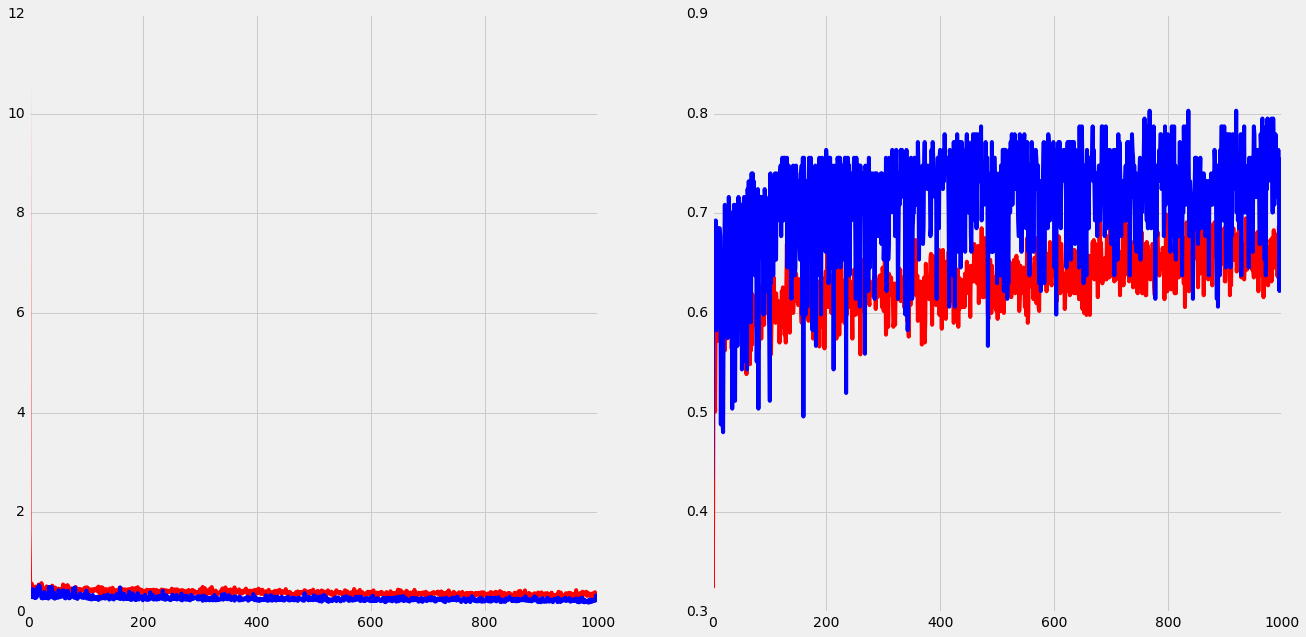

In [126]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['acc'], color='r')
ax2.plot(history.history['val_acc'], color='b')
plt.show()

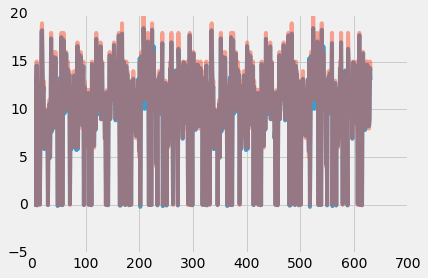

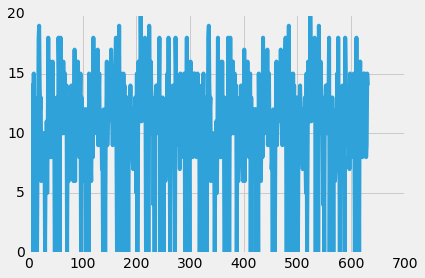

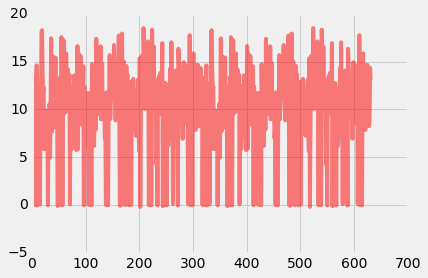

In [127]:
# test_data = handle_non_numerical_data(test_data)
# print (test_data.head())
# X_t = test_data.drop(['G3'], 1)



Xt = model.predict(X_train)

plt.plot((Xt), )
plt.plot((y_train.reshape(-1,1)),alpha=0.5)

plt.show()
plt.plot((y_train.reshape(-1,1)))
plt.show()
plt.plot((Xt), color="red",alpha=0.5 )
plt.show()